In [8]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

In [10]:
display(tag)

print("Hello!")

Hello!


# Big-O Notation Overview

## Math Review

+ Before we can discuss Big-O notation and algorithmic complexity, we must review a few key math topics

### Functions

+ A function is something that takes and input and produces and output.
+ Traditionally written like $f(x)$.
+ For example, the function $f(x) = x + 5$ is a function that takes in some value for $x$ and adds $5$ to it.
+ We can see some examples of plugging in numbers to our function below

    $
    \begin{aligned}
    f(x) &= x + 5 \\
    f(10) &= 10 + 5 = 15 \\
    f(4) &= 4 + 5 = 9 \\
    f(-4) &= -4 + 5 = 1
    \end{aligned}
    $

### Graphing functions

+ We can graph the inputs and outputs of functions on the standard **Cartesian Plane**
+ The **Cartesian Plane** is the standard 2-dimensional coordinate plane that you may be familiar with from high school mathematics
+ The **Cartesian Plane** consists of a **horizontal x-axis** and a **vertical y-axis**

In [ ]:
{
    "tags": [
        "hide-input",
    ]
}



# Big-O Notation

## What is Big-O?

+ Big-O notation measures the worst case time complexity of an algorithm
+ Why not just use the actual runtime of the algorithm to measure performance?
  + The actual running time of an algorithm (e.g. 10 seconds or 30 minutes) can vary based on a variety of factors, such as the computer hardware that the algorithm is running on or the programming language being used.
+ Instead, we use a method called **Big-O** to express the runtime of an algorithm in terms of how quickly the runtime grows relative to the input as the input gets arbitrarily large.
+ In **Big-O** notation, we use the size of the input, which we call $n$ to compare a function. As $n$ grows larger, we want to see how the runtime of the program changes.
+ We can view this notation on a graph. For example, the below graphs show $O(1)$ and $O(n)$ respectively.

+ 
+ In **Big-O** notation we don't care about constants, that is, we don't care about  any value that does not scale with the size of the input
  + e.g. 10, 2, 105 are all constants
+ 

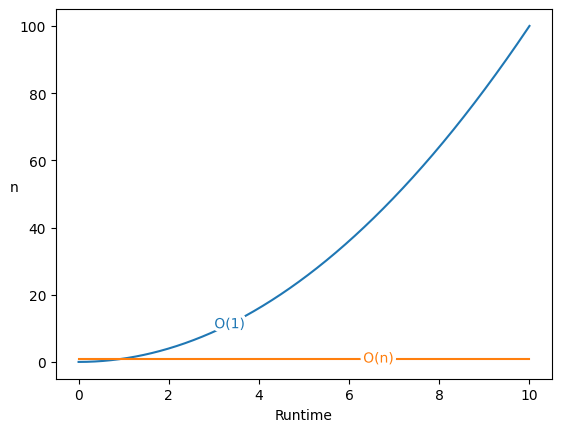

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from labellines import labelLine, labelLines

fig, ax1 = plt.subplots()

x = np.linspace(0, 10, 1000)
y = [1 for _ in x]

ax1.plot(x, x**2, label="O(1)")
ax1.plot(x, y, label="O(n)")

ax1.set_xlabel("Runtime")
ax1.set_ylabel("n", rotation=0)

labelLines(ax1.get_lines(), align=False, fontsize=10)

plt.show()